In [1]:
# Check torch version and CUDA status if GPU is enabled.
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.0.1
True


# Developing an Image Classifier Application

In this project, we'll train an image classifier to recognize different species of flowers. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories.

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content  
  
Here our network will be learning about flowers and end up as a command line application.

First up is importing the packages needed.

In [2]:
# Imports here
import torch
import numpy as np
from torch import nn, optim
from torchvision import datasets, transforms, models
from matplotlib import pyplot as plt 
from PIL import Image
%matplotlib inline

## Load the data

Here we'll use `torchvision` to load the data. The data can be [downloaded here](https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz). 

## Data Description
The dataset is split into three parts, training, validation, and testing. For the training, we'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. We'll also need to make sure the input data is resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet. For this we don't want any scaling or rotation transformations, but we'll need to resize then crop the images to the appropriate size.

The pre-trained networks we'll use were trained on the ImageNet dataset where each color channel was normalized separately. For all three sets we'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`, calculated from the ImageNet images.  These values will shift each color channel to be centered at 0 and range from -1 to 1.
 

In [3]:
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [ ]:
# Define your transforms for the training, validation, and testing sets
train_data_transforms = transforms.Compose([
    transforms.Resize(256),  # Resize 
    transforms.CenterCrop(224),  # Crop to 224x224
    transforms.RandomRotation(30),  # Add random rotation for data augmentation
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406],  # Normalize with the given means and stds
                         [0.229, 0.224, 0.225])
])

valid_data_transforms = transforms.Compose([
    transforms.Resize(256),  # Resize 
    transforms.CenterCrop(224),  # Center crop to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406],  # Normalize using same means and stds
                         [0.229, 0.224, 0.225])
])

test_data_transforms = transforms.Compose([
    transforms.Resize(256),  # Resize 
    transforms.CenterCrop(224),  # Center crop to 224x224
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize([0.485, 0.456, 0.406],  # Normalize using same means and stds
                         [0.229, 0.224, 0.225])
])

# Load the datasets with ImageFolder
train_dataset = datasets.ImageFolder(train_dir, transform=train_data_transforms)
valid_dataset = datasets.ImageFolder(valid_dir, transform=valid_data_transforms)
test_dataset = datasets.ImageFolder(test_dir, transform=test_data_transforms)

# Define the dataloaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

### Label mapping

We'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which we'll read in with the `json` module. This will give us a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [5]:
import json


with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

# Building and training the classifier

To do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html).
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We want to make sure we'll be updating only the weights of the feed-forward network. ect.

In [ ]:
# Build and train your network
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.vgg16(True)


# Turn of gradients for our model
for param in model.parameters():
    param.requires_grad = False
    

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
# Define my classifier
my_classifier = nn.Sequential(nn.Linear(25088, 512, bias=True),
                              nn.ReLU(inplace=True),
                              nn.Dropout(p=0.2, inplace=False),
                              nn.Linear(512, 102, bias=True),
                              nn.LogSoftmax(dim=1))
# Update our model 
model.classifier = my_classifier

In [9]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
# Loss calculation criterion
criterion = nn.NLLLoss()

# Define optimizer 
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Move the model to device
model = model.to(device)

In [11]:
# Train the model
model.train()
epochs = 2
steps = 1
running_loss = 0
print_every = 10

for epoch in range(epochs):
    for images, labels in train_loader:
        steps +=1
        images, labels = images.to(device), labels.to(device)

        # Zero out the gradients
        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if steps % print_every == 0:

            model.eval()
            valid_loss = 0
            accuracy = 0
            with torch.no_grad():
                for inputs, labels in valid_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model(inputs)
                    batch_loss = criterion(logps, labels)

                    valid_loss += batch_loss.item()

                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Validation loss: {valid_loss/len(valid_loader):.3f}.. "
                  f"Validation accuracy: {accuracy/len(valid_loader):.3f}")
            running_loss = 0
            model.train()

Epoch 1/2.. Train loss: 4.372.. Validation loss: 3.658.. Validation accuracy: 0.211
Epoch 1/2.. Train loss: 3.524.. Validation loss: 2.813.. Validation accuracy: 0.380
Epoch 1/2.. Train loss: 2.599.. Validation loss: 2.114.. Validation accuracy: 0.502
Epoch 1/2.. Train loss: 2.258.. Validation loss: 1.635.. Validation accuracy: 0.599
Epoch 1/2.. Train loss: 1.818.. Validation loss: 1.493.. Validation accuracy: 0.631
Epoch 1/2.. Train loss: 1.639.. Validation loss: 1.243.. Validation accuracy: 0.680
Epoch 1/2.. Train loss: 1.294.. Validation loss: 1.239.. Validation accuracy: 0.676
Epoch 1/2.. Train loss: 1.244.. Validation loss: 1.011.. Validation accuracy: 0.735
Epoch 1/2.. Train loss: 1.230.. Validation loss: 0.900.. Validation accuracy: 0.768
Epoch 1/2.. Train loss: 1.140.. Validation loss: 0.830.. Validation accuracy: 0.771
Epoch 2/2.. Train loss: 0.827.. Validation loss: 0.789.. Validation accuracy: 0.789
Epoch 2/2.. Train loss: 0.683.. Validation loss: 0.746.. Validation accuracy

## Testing your network

We'll test our trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images.

In [12]:
model.eval()
test_loss = 0
accuracy = 0

# Turn off gradients
with torch.no_grad():
    for inputs, labels in test_loader:
        # Move inputs and labels to device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass to get the model's predictions
        logps = model(inputs)
        
        # Calculate the test loss
        batch_loss = criterion(logps, labels)
        test_loss += batch_loss.item()
        
        # Calculate accuracy
        ps = torch.exp(logps)  # Get probs from logps
        top_p, top_class = ps.topk(1, dim=1)  # Get the top class
        equals = top_class == labels.view(*top_class.shape)  # Check if predictions match
        accuracy += torch.mean(equals.type(torch.FloatTensor).to(device)).item()  # Move accuracy to device

# Print the results
print(f"Test loss: {test_loss/len(test_loader):.3f}.. "
      f"Test accuracy: {accuracy/len(test_loader):.3f}")

Test loss: 0.785.. Test accuracy: 0.799


## Save the checkpoint

Now that yur network is trained, we'll save the model so we can load it later for making predictions. We'll save other things such as the mapping of classes to indices which we get from one of the image datasets: `image_datasets['train'].class_to_idx`.

In [13]:
# Save the checkpoint 
model.class_to_idx = train_dataset.class_to_idx

checkpoint = {'architecture': 'vgg16', # Model Architecture
              'state_dict': model.state_dict(), # Model params
              'optimizer': optimizer.state_dict, # Optimizer state
              'class_to_idx': model.class_to_idx, # Class to index mapping
              'classifier': model.classifier, # Custom classifier
              'epochs': 2, # No of epochs          
             }

torch.save(checkpoint, 'checkpoint.pth')

print("Model saved successfully!")

Model saved successfully!


## Loading the checkpoint

We'll write a function that can load a checkpoint and rebuild the model. That way we can come back to this project and keep working on it without having to retrain the network.

In [14]:
# Write a function that loads a checkpoint and rebuilds the model
def get_checkpoint(file, model):
    # Load  the checkpoint
    checkpoint = torch.load(file)
    # Load the state dict and rebuild the model
    model.load_state_dict(checkpoint['state_dict'])
    
    # Load other checkpoint details
    model.class_to_idx = checkpoint['class_to_idx']
    model.optimizer_state_dict = checkpoint['optimizer']
    model.epochs = checkpoint['epochs']
    return model

# Inference for classification

We'll write a function to use a trained network for inference. We'll pass an image into the network and predict the class of the flower in the image. 

## Image Preprocessing

We'll write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training. 

In [15]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    
    # Process a PIL image for use in a PyTorch model
    
    # Load the image
    img = Image.open(image)
    
    # Resize the image so that the shortest side is 256 pixels
    if img.size[0] > img.size[1]:
        img.thumbnail((256, 256 * img.size[0] / img.size[1]))
    else:
        img.thumbnail((256 * img.size[1] / img.size[0], 256))
    
    # Crop out the center 224x224 portion of the image
    left = (img.width - 224) / 2
    top = (img.height - 224) / 2
    right = left + 224
    bottom = top + 224
    img = img.crop((left, top, right, bottom))
    
    # Convert image to a numpy array and normalize
    img = np.array(img) / 255.0
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = (img - mean) / std
    
    # Reorder dimensions to match PyTorch's expected input
    img = img.transpose((2, 0, 1))
    
    # Convert to a tensor
    return torch.tensor(img).float()



In [16]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

## Class Prediction

Once we can get images in the correct format, we'll write a function for making predictions with our model. We'll predict the top 5 most probable classes.

This method should take a path to an image and a model checkpoint, then return the probabilities and classes.

In [24]:
def predict(image_path, model, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    # Preprocess the image
    image = process_image(image_path)
    
    # Add batch dimension since the model expects a batch of images
    image = image.unsqueeze(0)
    image = image.to(device)
    
    # Invert the class_to_idx dictionary to map indices to class labels
    idx_to_class = {v: k for k, v in model.class_to_idx.items()}
    
    # Move model to evaluation mode
    model.eval()
    
    # Turn off gradients
    with torch.no_grad():
        # Perform forward pass through the model
        output = model(image)
    
    # Get the probabilities
    probs = torch.exp(output)
    
    # Get the top K probabilities and indices
    top_probs, top_indices = probs.topk(topk, dim=1)
    
    # Convert tensors to lists
    top_probs = top_probs.cpu().numpy().flatten().tolist()
    top_indices = top_indices.cpu().numpy().flatten().tolist()
    
    # Map indices to the actual class labels
    top_classes = [idx_to_class[i] for i in top_indices]
    
    # Return the top K probabilities and corresponding class labels
    return top_probs, top_classes

## Sanity Checking

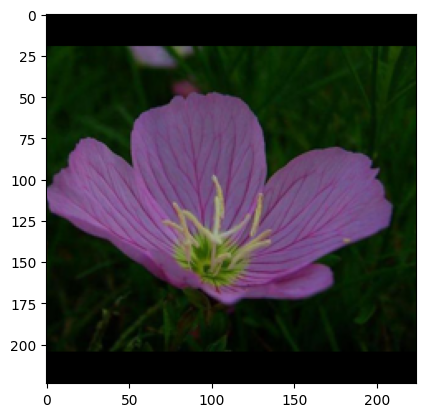

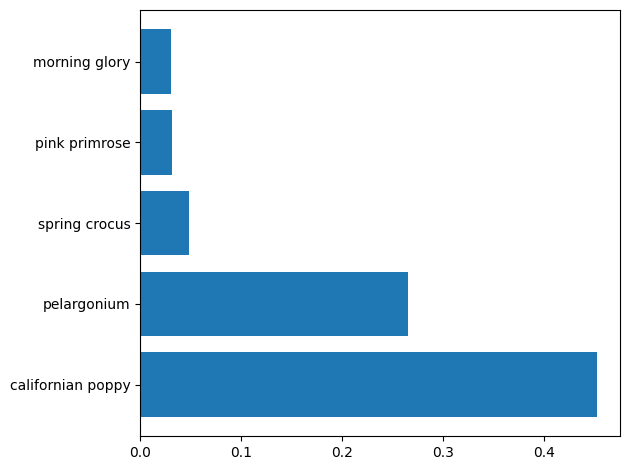

In [25]:
# Display an image along with the top 5 classes
image_path = 'flowers/test/1/image_06752.jpg'

# Get predictions
top_probs, top_classes = predict(image_path, model)

# Convert class indices to actual class names using cat_to_name
top_class_names = [cat_to_name.get(top_class) for top_class in top_classes]

# Show the processed image
imshow(process_image(image_path))

# Create a bar plot
fig, ax = plt.subplots()
ax.barh(top_class_names, top_probs)  # Horizontal bar plot

plt.tight_layout()
plt.show()